# 이미지 데이터 셋을 이용한 CNN Modeling
> # Google Drive Mount
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. Google Drive Mount
* <font color = 'blue'>'dogs_and_cats_small.zip' 파일 다운로드</font>
 - https://drive.google.com/file/d/11afb-PJul1Qs7PqjAlXybMHKPRf_RD0l/view?usp=sharing

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Make 'datasets' Directory
 - <font color = 'red'>'dogs_and_cats_small.zip' 파일을 생성 후 구글 드라이브 디렉토리에 업로드

In [ ]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/datasets'

* 마운트 및 파일 업로드 결과 확인

In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Apr  4 05:46 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# II. Data Preprocessing

> ## 1) Unzip 'dogs_and_cats_small.zip'

In [7]:
!unzip -q /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [ ]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 25 01:33 drive
drwxr-xr-x 1 root root 4096 Mar 23 18:57 sample_data
drwxr-xr-x 4 root root 4096 Mar 25 01:33 test
drwxr-xr-x 4 root root 4096 Mar 25 01:33 train
drwxr-xr-x 4 root root 4096 Mar 25 01:33 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [8]:
train_dir = 'train'
valid_dir = 'validation'
test_dir  = 'test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Resizing & Generator
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20, #20개씩 생성 _ 총 2000장이니까 100번 필요
                  class_mode = 'binary') #class_mode : labeling 역할 : 알파벳 순으로 됨 (다진분류의 경우 원핫인코딩)
                  # flow_from_directory 는 파일을 20개씩 읽어올 때, 서로 다른 경로에서 가지고 온것을 0,1로 구분지으며 labeling 한다.
                  # 결국 유형별로 파일들을 디렉토리화 하면 그 자체가 labeling된다. 

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20, #20개씩 생성 _ 총 1000장이니까 50번 필요
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator

In [10]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [11]:
labels_batch

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0.], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

* 모델 학습방법 설정

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 11분

In [15]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100, # 2000장 /20장
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50) #1000장 / 20장

Epoch 1/60
100/100 [==============================] - 23s 96ms/step - loss: 0.6943 - accuracy: 0.5315 - val_loss: 0.6834 - val_accuracy: 0.5150
Epoch 2/60
100/100 [==============================] - 10s 96ms/step - loss: 0.6968 - accuracy: 0.5130 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/60
100/100 [==============================] - 10s 104ms/step - loss: 0.6809 - accuracy: 0.5480 - val_loss: 0.6723 - val_accuracy: 0.5750
Epoch 4/60
100/100 [==============================] - 10s 103ms/step - loss: 0.6440 - accuracy: 0.6250 - val_loss: 0.6314 - val_accuracy: 0.6470
Epoch 5/60
100/100 [==============================] - 11s 114ms/step - loss: 0.5954 - accuracy: 0.6730 - val_loss: 0.6142 - val_accuracy: 0.6460
Epoch 6/60
100/100 [==============================] - 9s 89ms/step - loss: 0.5651 - accuracy: 0.7065 - val_loss: 0.5909 - val_accuracy: 0.6780
Epoch 7/60
100/100 [==============================] - 10s 98ms/step - loss: 0.5305 - accuracy: 0.7355 - val_loss: 0.5863 - val_accurac

> ## 4) 학습 결과 시각화

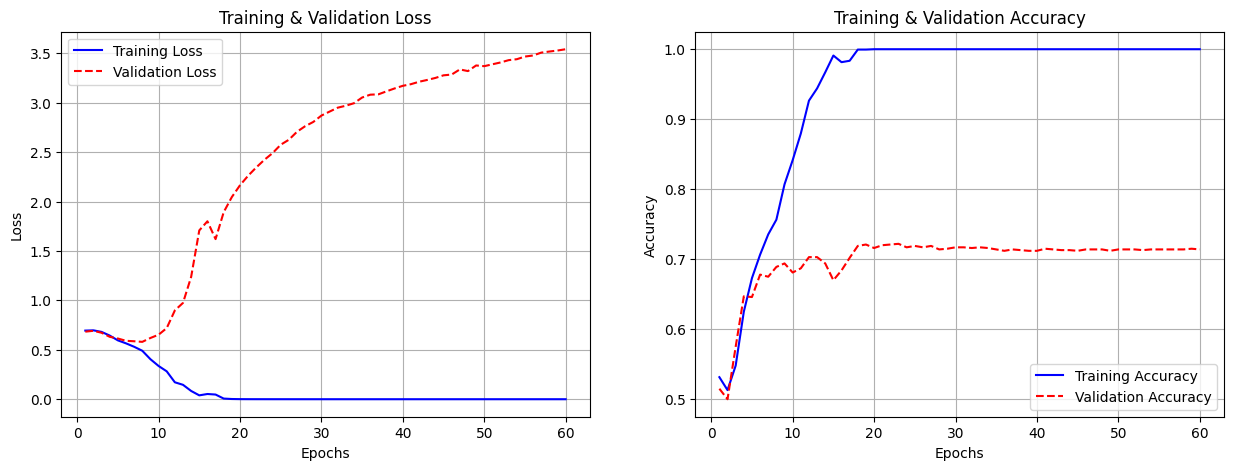

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [18]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.86012
Accuracy = 0.70200


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

* Mount Google Drive

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Make 'models' Directory

In [21]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

> ## 2) Model Save

In [24]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [25]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40525
-rw------- 1 root root 41496728 Apr  4 06:04 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [26]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [27]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50, 
                                      verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.86012
Accuracy = 0.70200


# 
# 
# 
# The End
# 
# 
# 